In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

save_path = r'/home/luan/Documentos/figuras_pesquisa/IC_Chemical_Potential/'

In [14]:
fn = ['N10', 'N20', 'N40', 'N60', 'N100']
fn_prefixo = 'DMRG/U10'
fn_posfixo = '_Track1.csv'


mus = []
for i in range(len(fn)):
    filenames = fn_prefixo + fn[i] + fn_posfixo
    print(filenames)
    df = pd.read_csv(filenames)
    
    x = np.array(df['Onsite_Energy'])

    mu = np.array(df['Chemical_Potential'])
    mus.append(mu)
    
mus = np.array(mus)

DMRG/U10N10_Track1.csv
DMRG/U10N20_Track1.csv
DMRG/U10N40_Track1.csv
DMRG/U10N60_Track1.csv
DMRG/U10N100_Track1.csv


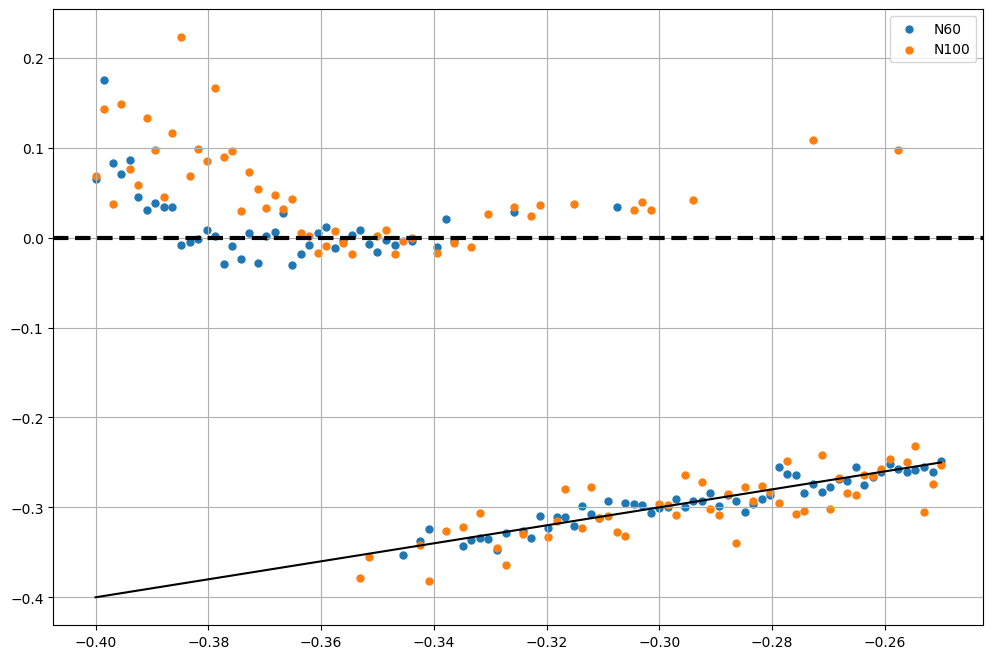

In [22]:
fig = plt.figure(figsize = (12, 8))

for i in range(3, len(mus)):
    plt.scatter(0.5-x/10, mus[i]/10, label = fn[i], s = 25)
    
plt.plot(0.5-x/10, 0.5-x/10, color = 'black')
plt.axhline(y = 0, linestyle = 'dashed', c = 'black', linewidth = 3)

plt.grid(visible = True)

plt.legend()

plt.show()

In [ ]:


def func1():
    df1 = pd.read_csv(r'ED_N6U10.csv')
    df2 = pd.read_csv(r'ED_N6U5.csv')

    x = np.array(df1['x'])

    mu1 = np.array(df1['mu'])
    mu2 = np.array(df2['mu'])


    fig = plt.figure(figsize = (16, 10))

    plt.plot(x, x, color = 'black', label = r'f(x) = x')

    plt.plot(x, mu2, marker = 'o', markersize = 10, label = r'U=5, N = 6')
    plt.plot(x, mu1, marker = 's', markersize = 10, label = r'U=10, N = 6')

    plt.xlabel(r'$\dfrac{1}{2}-\dfrac{\epsilon_d}{U}$', fontsize = 30)
    plt.ylabel(r'$\dfrac{\mu}{U}$', fontsize = 30)

    plt.axhline(0, c = 'black', linestyle = 'dashed', linewidth = 3, label = r'$\mu = 0$')

    plt.tick_params(labelsize = 25)

    plt.legend(loc = 'upper left', fontsize = 25)


    plt.grid(visible = True)

    #plt.savefig(save_path + r'ED_Chem_Pot.png', format = 'png')

    plt.show()

